In [263]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
# for Notebooks
init_notebook_mode(connected=True)
# for offline use
cf.go_offline()
%matplotlib inline

In [229]:
# special methods to display large DataFrames
# credit goes to professor wonhee lee, Department of Software Convergence of Khyunghee University.
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
def df_interact(df, nrows=7, ncols=8):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

# Original data

In [105]:
idol_df = pd.read_csv("profiles.csv", encoding="utf-8", index_col="아이돌넘버")
df_interact(idol_df)

interactive(children=(IntSlider(value=0, description='row', max=52, step=7), IntSlider(value=0, description='c…

(52 rows, 20 columns) total


Types according to each idol

In [129]:
princess = ['아마미 하루카','하기와라 유키호','키쿠치 마코토','가나하 히비키','카스가 미라이','타나카 코토하',
            '사타케 미나코','토쿠가와 마츠리','나나오 유리코','타카야마 사요코','마츠다 아리사','코사카 우미',
            '나카타니 이쿠','에밀리 스튜어트','야부키 카나','요코야마 나오','후쿠다 노리코']
fairy = ['키사라기 치하야','미나세 이오리','시죠 타카네', '아키즈키 리츠코','모가미 시즈카',' 토코로 메구미',
         '로코','텐쿠바시 토모카','키타자와 시호','마이하마 아유무','니카이도 치즈루',
        '마카베 미즈키','모모세 리오','나가요시 스바루','스오 모모코','줄리아','시라이시 츠무기']
angel = ['호시이 미키','타카츠키 야요이','미우라 아즈사', '후타미 아미', '후타미 마미','이부키 츠바사',
         '시마바라 엘레나','하코자키 세리카','노노하라 아카네','모치즈키 안나','키노시타 히나타','바바 코노미',
        '오오가미 타마키','토요카와 후우카','미야오 미야','시노미야 카렌','키타카미 레이카','사쿠라모리 카오리']

# Data Cleaning

It is found that some of codes remove desired data as well, but since the size of data is not big, lost data are manually recovered.

In [162]:
# Data Cleaning
idol_df["이름"] = idol_df["이름"].str.split("[").str[0]
idol_df["한자"] = idol_df["한자"].str.split("[").str[0]
idol_df["히라가나/가타가나"] = idol_df["히라가나/가타가나"].str.split("[").str[0]
idol_df["나이"] = idol_df["나이"].str.split("[").str[0]
idol_df["키"] = idol_df["키"].str.split("[").str[0]
idol_df["몸무게"] = idol_df["몸무게"].str.split("[").str[0]
idol_df["B-W-H"] = idol_df["B-W-H"].str.split("[").str[0]    # this part deletes some data, thus I manually refilled missing data.
idol_df["생일"] = idol_df["생일"].str.split("[").str[0]
idol_df["별자리"] = idol_df["별자리"].str.split("[").str[0]
idol_df["혈액형"] = idol_df["혈액형"].str.split("[").str[0]
idol_df["자주 쓰는 손"] = idol_df["자주 쓰는 손"].str.split("[").str[0]
idol_df["출신지"] = idol_df["출신지"].str.split("[").str[0]
idol_df["취미"] = idol_df["취미"].str.split("[").str[0]
idol_df["특기"] = idol_df["특기"].str.split("[").str[0]
idol_df["특기"][idol_df["특기"] == '0'] = None
idol_df["이미지 컬러 코드"] = idol_df["이미지 컬러 코드"].str.split("[").str[0].str.split(" ").str[-1]
idol_df["성우"] = idol_df["성우"].str.split("[").str[0]
idol_df["좋아하는 것"] = idol_df["좋아하는 것"].str.split("[").str[0]
idol_df["닉네임"] = idol_df["닉네임"].str.split("[").str[0]
idol_df["투타"] = idol_df["투타"].str.split("[").str[0]

idol_df["타입"][idol_df["이름"].isin(princess)] = "프린세스"
idol_df["타입"][idol_df["이름"].isin(fairy)] = "페어리"
idol_df["타입"][idol_df["이름"].isin(angel)] = "엔젤"

# save cleaned version
idol_df.to_csv("Cleaned_Profile.csv", encoding="utf-8")
idol_df.to_excel("Cleaned_Profile.xlsx", encoding="utf-8")
df_interact(idol_df)

interactive(children=(IntSlider(value=0, description='row', max=52, step=7), IntSlider(value=0, description='c…

(52 rows, 20 columns) total


In [232]:
# Cleaning again for statistics
# Only leave numeric values if possible
stats = pd.read_excel("Cleaned_Profile.xlsx", index_col="아이돌넘버")

# Age
age = stats["나이"].str.split("→").str[-1].str.split("세").str[0]
stats["나이"] = age
stats["나이"].astype(int)

# Height
height = stats["키"].str.split("→").str[-1].str.replace(" ","").str.rstrip("㎝").str.rstrip("cm")
stats["키"] = height
stats["키"].astype(int)

# Weight
weight = stats["몸무게"].str.split("→").str[-1].str.replace(" ","").str.rstrip("㎏").str.rstrip("kg")
stats["몸무게"] = weight
stats["몸무게"].astype(float)

# B-W-H
bsizes, wsizes, hsizes = stats["B-W-H"].str.split("→").str[-1].str.split("(").str[0].str.split('/').str
b = bsizes.str.strip().str.split(" ").str[0]
w = wsizes.str.strip().str.split(" ").str[0]
h = hsizes.str.strip().str.split(" ").str[0]
stats = stats.assign(B=b,W=w,H=h)
stats = stats.drop(columns=["B-W-H"])
df_interact(stats)

interactive(children=(IntSlider(value=0, description='row', max=52, step=7), IntSlider(value=0, description='c…

(52 rows, 22 columns) total


# Statistics

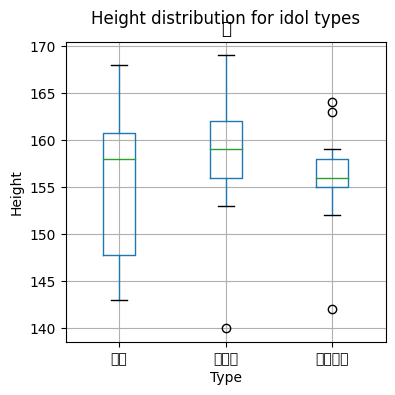

In [305]:
physical = stats[["나이","키","몸무게","B",'W','H','타입','이미지 컬러 코드']]
physical["키"] = physical['키'].astype(float)
physical["몸무게"] = physical['몸무게'].astype(float)
physical["B"] = physical['B'].astype(float)
physical["W"] = physical['W'].astype(float)
physical["H"] = physical['H'].astype(float)
ax = physical.boxplot(by="타입", column="키", figsize=(4,4))
ax.set_xlabel("Type")
ax.set_ylabel("Height")
plt.suptitle('Height distribution for idol types')
plt.show()

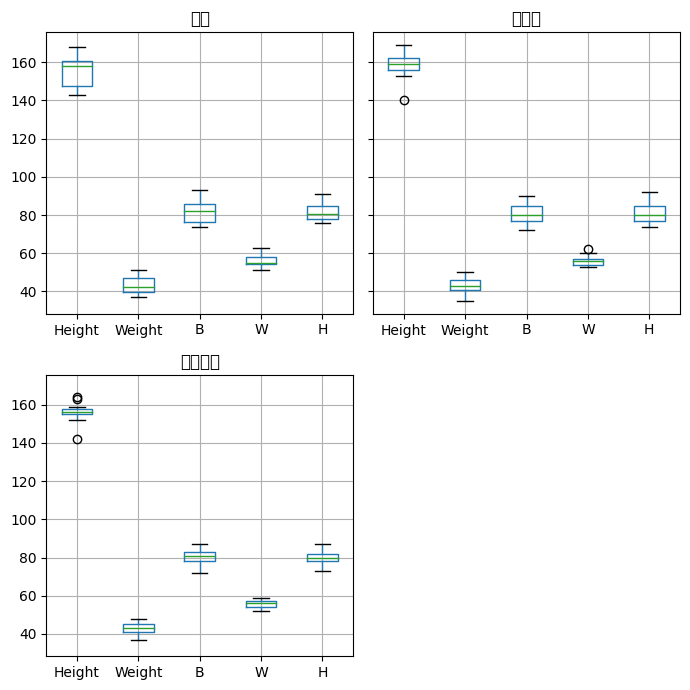

In [313]:
physical.columns = ["Age",'Height','Weight','B',"W",'H', 'Type','Color_Code']
groupby_type = physical.groupby(physical['Type'])
ax = groupby_type.boxplot(figsize=(7,7))

plt.tight_layout()

In [327]:
print(physical["Height"].max())
print(physical["Height"].min())
print(physical["Height"].mean())
print(physical["Height"].median())
print(physical["Height"].std())
print()

print(physical["B"].max())
print(physical["B"].min())
print(physical["B"].mean())
print(physical["B"].median())
print(physical["B"].std())
print()

print(physical["W"].max())
print(physical["W"].min())
print(physical["W"].mean())
print(physical["W"].median())
print(physical["W"].std())
print()

print(physical["H"].max())
print(physical["H"].min())
print(physical["H"].mean())
print(physical["H"].median())
print(physical["H"].std())
print()

169.0
140.0
156.6346153846154
157.5
6.511012830924583

93.0
72.0
80.96153846153847
81.0
5.3393160260414145

63.0
51.0
55.96153846153846
56.0
2.433117410201373

92.0
73.0
81.09615384615384
80.0
4.353315686469722

